In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA


In [131]:
df = pd.read_csv("./clean.csv")

In [132]:
df = df.drop(columns="Unnamed: 0")

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'App Id', 'Rating Count', 'Minimum Installs', 'Currency',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Privacy Policy', 'Ad Supported',
       'In app purchases', 'Editor Choice', 'Summary', 'Android version Text',
       'Developer', 'Developer Address', 'Developer Internal ID', 'Version',
       'popularity', 'Rating_category', 'Reviews_category', 'Size_category',
       'Installs_category', 'Rating_count_category',
       'Minimum_installs_category'],
      dtype='object')

In [133]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Developer Address,Developer Internal ID,Version,popularity,Rating_category,Reviews_category,Size_category,Installs_category,Rating_count_category,Minimum_installs_category
0,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.431532,313.0,19.0,75.0,Free,0.0,Everyone,Art & Design,...,NaN,7.028150e+18,1.1,0,Very Low,Very Few,Small,High,Few,Low
1,Infinite Painter,ART_AND_DESIGN,4.070869,39499.5,76.5,5.5,Free,0.0,Everyone,Art & Design,...,1155 SEMINOLE TRAIL\nPO BOX 6402\nCHARLOTTESVI...,8.161090e+18,6.6.1,0,Low,Medium,Very Large,Low,Many,High
2,Garden Coloring Book,ART_AND_DESIGN,4.369976,9690.0,36.0,1.0,Free,0.0,Everyone,Art & Design,...,Flat 11 1/F Block 10 Shek Lei (2) Estate ...,7.021960e+18,3.2.1,0,High,Few,Very Large,Very Low,Medium,Medium
3,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.160000,22435.0,25.0,10.0,Free,0.0,Teen,Art & Design,...,NaN,8.883360e+18,1.5,0,Low,Medium,Medium,Low,Very Few,Very Low
4,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.141526,32554.5,21.5,10.0,Free,0.0,Teen,Art & Design,...,"Surat, Gujarat, India",5.388640e+18,4.3,0,Low,Medium,Medium,Low,Many,High


In [134]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)



Numerical Columns: Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Rating Count',
       'Minimum Installs', 'Developer Internal ID', 'popularity'],
      dtype='object')


1.Frequent pattern


In [135]:
df_drop = df.drop(columns=['Rating', 'Reviews', 'Size', 'Installs',  'Rating Count',
       'Minimum Installs', 'Developer Internal ID'])

In [136]:
df_drop['Price'] = pd.cut(df_drop['Price'], bins=[-np.inf, 0.33, 0.66, np.inf], labels=['free', 'cheap', 'expensive'], duplicates="drop")

In [137]:
df_drop=df_drop.drop(columns= [ 'Price', 'Last Updated', 'Current Ver', 'App Id', 'Currency', 
                               'Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy',
                               'Summary','Developer Address','Android Ver', 'Minimum Android', 'Released','Android version Text',
                               'Developer','Version'])

In [138]:
df_encoded = pd.get_dummies(df_drop)
df_encoded

,In app purchases,Editor Choice,popularity,App_#NAME?,App_.R,App_10 Best Foods for You,App_10 WPM Amateur ham radio CW Morse code trainer,App_100 Doors of Revenge,App_101 C Programming Problems,App_11st,...,Rating_count_category_Few,Rating_count_category_Many,Rating_count_category_Medium,Rating_count_category_Very Few,Rating_count_category_Very Many,Minimum_installs_category_High,Minimum_installs_category_Low,Minimum_installs_category_Medium,Minimum_installs_category_Very High,Minimum_installs_category_Very Low
0,False,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,True,False,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,True,False,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,False,False,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,False,False,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,True,False,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6246,False,False,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6247,False,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6248,True,False,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [139]:
frequent_itemsets = apriori(df_encoded, min_support=0.5, use_colnames=True)
print(frequent_itemsets)

c:\Users\Elham\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



   support                                           itemsets
0  0.93584                                        (Type_Free)
1  0.85088                          (Content Rating_Everyone)
2   0.6848                                (Ad Supported_True)
3  0.79632               (Type_Free, Content Rating_Everyone)
4  0.67216                     (Type_Free, Ad Supported_True)
5   0.5744       (Content Rating_Everyone, Ad Supported_True)
6  0.56416  (Type_Free, Content Rating_Everyone, Ad Suppor...


In [140]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(rules)


                                    antecedents  \
0                                   (Type_Free)   
1                     (Content Rating_Everyone)   
2                                   (Type_Free)   
3                           (Ad Supported_True)   
4                           (Ad Supported_True)   
5          (Type_Free, Content Rating_Everyone)   
6                (Type_Free, Ad Supported_True)   
7  (Content Rating_Everyone, Ad Supported_True)   
8                           (Ad Supported_True)   

                            consequents  antecedent support  \
0             (Content Rating_Everyone)             0.93584   
1                           (Type_Free)             0.85088   
2                   (Ad Supported_True)             0.93584   
3                           (Type_Free)             0.68480   
4             (Content Rating_Everyone)             0.68480   
5                   (Ad Supported_True)             0.79632   
6             (Content Rating_Everyone)         

2.clustring


In [141]:
for col in df_drop.columns:
    print(col , df_drop[col].dtype)

App object
Category object
Type object
Content Rating object
Genres object
Ad Supported object
In app purchases bool
Editor Choice bool
popularity int64
Rating_category object
Reviews_category object
Size_category object
Installs_category object
Rating_count_category object
Minimum_installs_category object


In [142]:


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_encoded)


c:\Users\Elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [143]:
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(df_encoded)


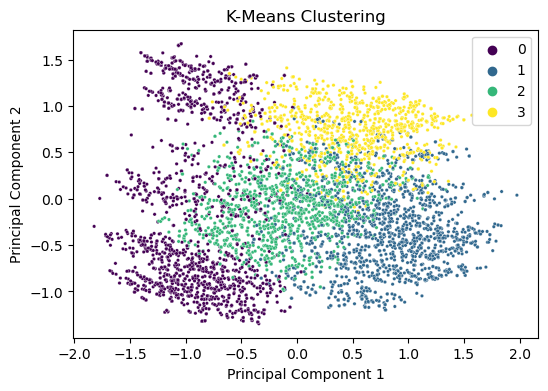

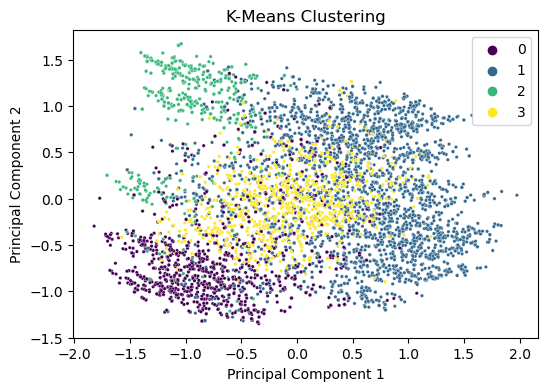

In [144]:
pca = PCA(n_components=2)

visualize = pca.fit_transform(df_encoded)

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=visualize[:, 0], y=visualize[:, 1], hue=kmeans_labels, palette='viridis', s=6)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

pca = PCA(n_components=2)

visualize = pca.fit_transform(df_encoded)

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=visualize[:, 0], y=visualize[:, 1], hue=hierarchical_labels, palette='viridis', s=6)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [145]:


pca = PCA(n_components=3)
visualize = pca.fit_transform(df_encoded)


fig_kmeans = px.scatter_3d(
    x=visualize[:, 0], 
    y=visualize[:, 1], 
    z=visualize[:, 2], 
    color=kmeans_labels, 
    title='K-Means Clustering',
    size_max=1,
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'}
)

fig_kmeans.show()

fig_hierarchical = px.scatter_3d(
    x=visualize[:, 0], 
    y=visualize[:, 1], 
    z=visualize[:, 2], 
    color=hierarchical_labels, 
    title='Hierarchical Clustering',
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'}
)

fig_hierarchical.show()


c:\Users\Elham\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\Elham\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



c:\Users\Elham\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\Elham\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [146]:
df_drop.columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Ad Supported',
       'In app purchases', 'Editor Choice', 'popularity', 'Rating_category',
       'Reviews_category', 'Size_category', 'Installs_category',
       'Rating_count_category', 'Minimum_installs_category'],
      dtype='object')

In [147]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'App Id', 'Rating Count', 'Minimum Installs', 'Currency',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Privacy Policy', 'Ad Supported',
       'In app purchases', 'Editor Choice', 'Summary', 'Android version Text',
       'Developer', 'Developer Address', 'Developer Internal ID', 'Version',
       'popularity', 'Rating_category', 'Reviews_category', 'Size_category',
       'Installs_category', 'Rating_count_category',
       'Minimum_installs_category'],
      dtype='object')

Selected Features: Index(['Rating', 'Reviews', 'Rating Count', 'Minimum Installs',
       'Reviews_per_Install'],
      dtype='object')


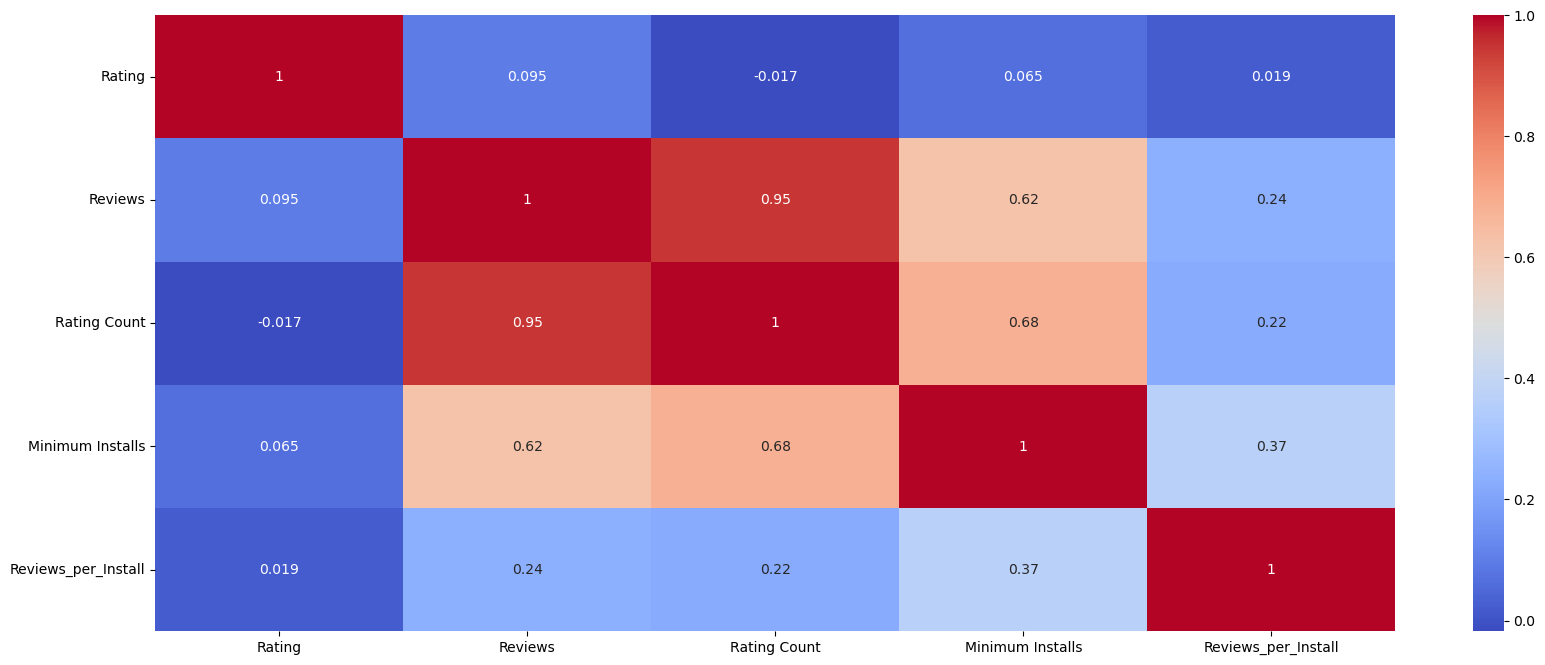

Rating                 1.000000
Reviews                0.094961
Minimum Installs       0.064569
Reviews_per_Install    0.018845
Rating Count          -0.017484
Name: Rating, dtype: float64


In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  # وارد کردن enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats


numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Rating Count', 'Minimum Installs']

imputer = IterativeImputer()
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

df['Reviews_per_Install'] = df['Reviews'] / df['Installs']
df['Price_per_Install'] = df['Price'] / df['Installs']
df['log_Reviews'] = np.log1p(df['Reviews'])
df['sqrt_Installs'] = np.sqrt(df['Installs'])

numeric_columns.extend(['Reviews_per_Install', 'Price_per_Install', 'log_Reviews', 'sqrt_Installs'])
df = df[(np.abs(stats.zscore(df[numeric_columns])) < 3).all(axis=1)]

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[numeric_columns])

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(df[numeric_columns], df['Rating'])
selected_features = df[numeric_columns].columns[selector.get_support()]

if 'Rating' not in selected_features:
    selected_features = np.append(selected_features, 'Rating')

print("Selected Features:", selected_features)

correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

target_correlation = correlation_matrix['Rating'].sort_values(ascending=False)
print(target_correlation)


3.classification

C:\Users\Elham\AppData\Local\Temp\ipykernel_14852\2287945837.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



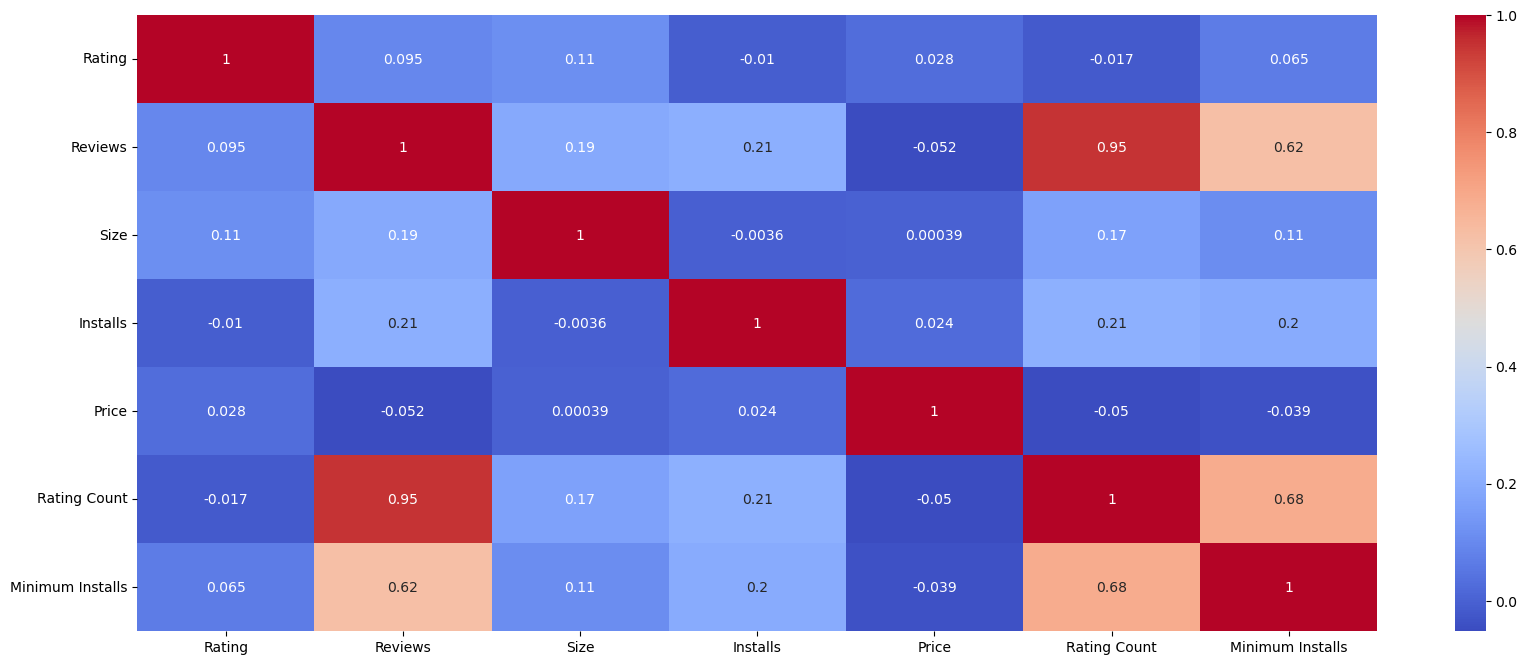

Rating              1.000000
Size                0.112972
Reviews             0.094961
Minimum Installs    0.064569
Price               0.027875
Installs           -0.010137
Rating Count       -0.017484
Name: Rating, dtype: float64


In [149]:


df.fillna(df.mean(), inplace=True)

numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Rating Count', 'Minimum Installs']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

target_correlation = correlation_matrix['Rating'].sort_values(ascending=False)
print(target_correlation)


In [150]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score



In [151]:
rating_mean = df['Rating'].mean()
rating_std = df['Rating'].std()

def categorize_rating(rating):
    if rating > rating_mean + rating_std:
        return 'High'
    elif rating < rating_mean - rating_std:
        return 'Low'
    else:
        return 'Medium'

df['Rating_Category'] = df['Rating'].apply(categorize_rating)

X = df[selected_features].drop(columns='Rating')
y = df['Rating_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

classifiers = [
    ('Naive Bayes', nb_classifier),
    ('Random Forest', rf_classifier),
    ('SVM', svm_classifier)
]

evaluation_metrics = {
    'Model': [],
    'Accuracy': [],
    'F1-Score': [],
    'Recall': [],
    'Precision': []
}

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    evaluation_metrics['Model'].append(name)
    evaluation_metrics['Accuracy'].append(accuracy)
    evaluation_metrics['F1-Score'].append(f1)
    evaluation_metrics['Recall'].append(recall)
    evaluation_metrics['Precision'].append(precision)

df_metrics = pd.DataFrame(evaluation_metrics)
print(df_metrics)

           Model  Accuracy  F1-Score    Recall  Precision
0    Naive Bayes  0.184801  0.171123  0.184801   0.822637
1  Random Forest  0.917098  0.909238  0.917098   0.909452
2            SVM  0.907599  0.883655  0.907599   0.877088


c:\Users\Elham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

